# Libraries and setup variables

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

%matplotlib inline
sns.set()

### Loading the processed dataset

Here we'll load the data into a dataframe, and run a series of initial exploratory analysis.

In [2]:
df = pd.read_csv('../data/processed/census_income_learn.csv')

### Initial exploration of features.

First we can see that most of people don't earn over 50K, only 12382 (6.2%) of the entire set of 199523 do.

If we just said that every person earns less than 50K, we'd get over 93% accuracy!!! This will be the benchmark to measure our model training.

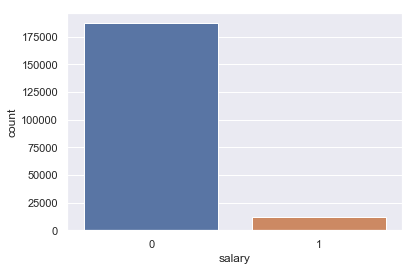

In [3]:
sns.countplot(x='salary', data=df)

### Sex

It's interesting to see that a higher proportion of men earn more than 50K.

10% of men earn over 50K, while 2.5% of women do.

0.10172809009933116
0.02560970918602862


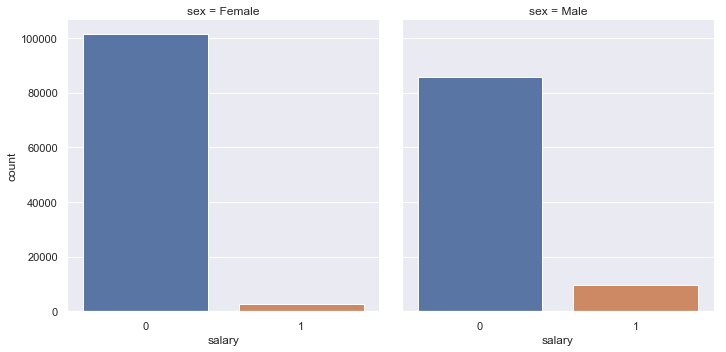

In [4]:
sns.catplot(x='salary', col='sex', kind='count', data=df)
print(df[df['sex']=='Male']['salary'].sum()/df[df['sex']=='Male']['salary'].count())
print(df[df['sex']=='Female']['salary'].sum()/df[df['sex']=='Female']['salary'].count())

### Education level

We can see that (obviously) primary and secondary school education, as well as children don't have income over 50K. 

This column could be simplified in the number of categories.

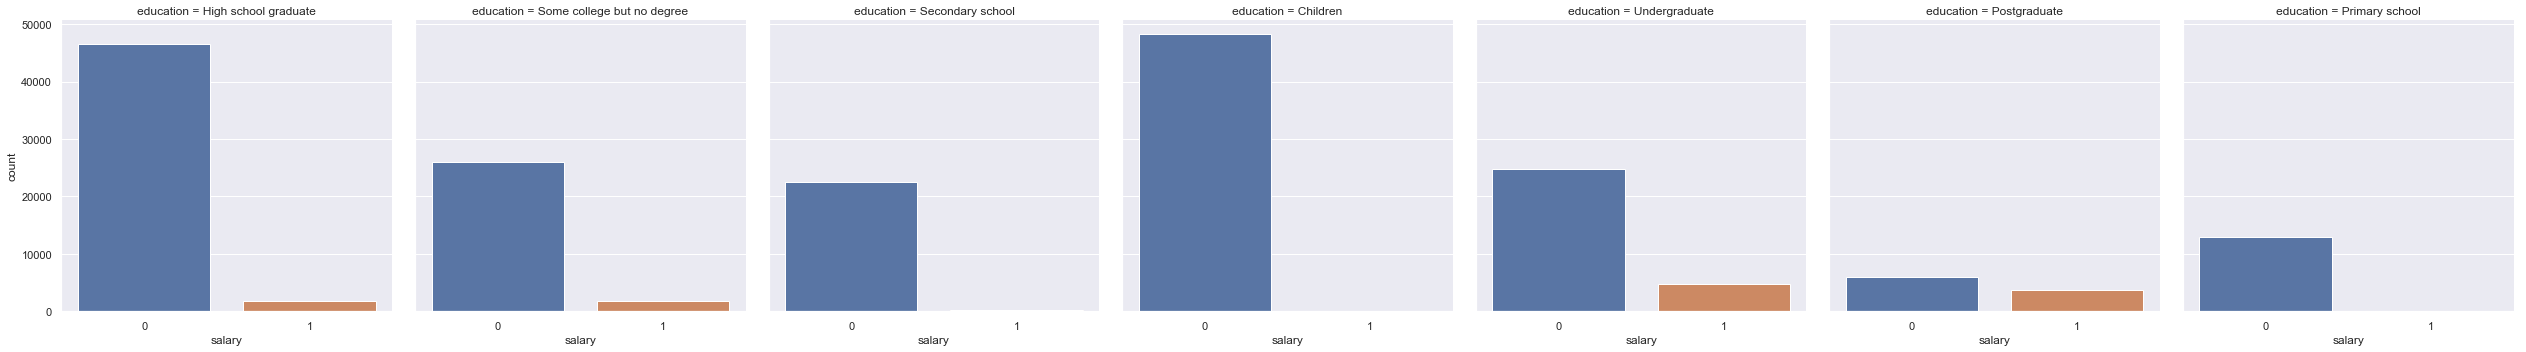

In [14]:
sns.catplot(x='salary', col='education', kind='count', data=df)
plt.show()

### Stocks and capital gains

This seems like should be a strong predictor. However the histograms are not very helpful, since most people don't have capital gains or stocks.

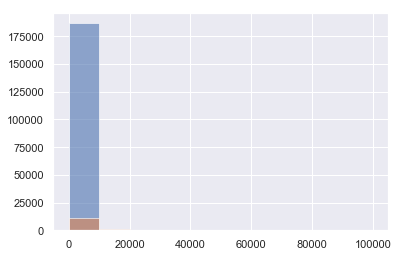

In [13]:
df.groupby('salary')['capital gains'].hist(alpha=0.6)
plt.show()

But we can exclude people without capital gains, in which case we can see that people with capital gains do appear more likely to have a higher income.

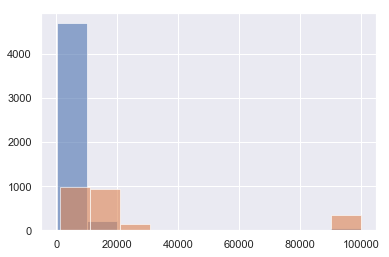

In [12]:
df[df['capital gains']!=0].groupby('salary')['capital gains'].hist(alpha=0.6)
plt.show()

Capital Losses appear more like a mixed bag, since some people managed to earn more than 50K despite the losses.

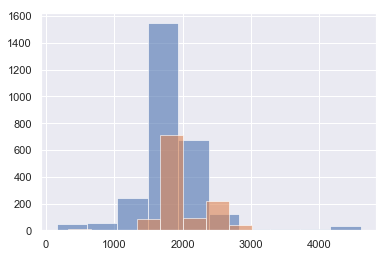

In [11]:
df[df['capital losses']!=0].groupby('salary')['capital losses'].hist(alpha=0.6)
plt.show()

Dividends from stock definitely contribute to the earnings of those with higher income. 

This is also observed in the swarm and strip plots

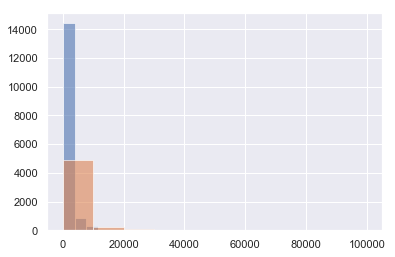

In [16]:
df[df['dividends from stocks']!=0].groupby('salary')['dividends from stocks'].hist(alpha=0.6)
plt.show()

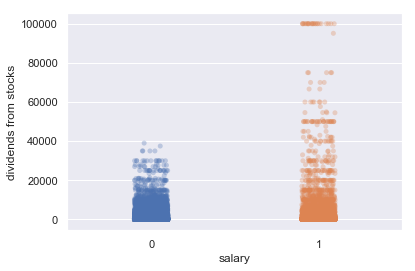

In [17]:
sns.stripplot(x='salary', y='dividends from stocks', data=df[df['dividends from stocks']!=0], alpha=0.3, jitter=True)
plt.show()